In [2]:
import kagglehub
from seaborn import heatmap

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\manir\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [1]:
import pandas as pd

In [3]:
books = pd.read_csv(f"{path}/books.csv")

In [4]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

books.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,6800,6801,6802,6803,6804,6805,6806,6807,6808,6809
isbn13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
isbn10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
subtitle,True,False,True,True,True,True,True,False,False,True,...,True,True,True,True,True,False,True,True,True,False
authors,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
categories,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
thumbnail,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
description,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
published_year,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
average_rating,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


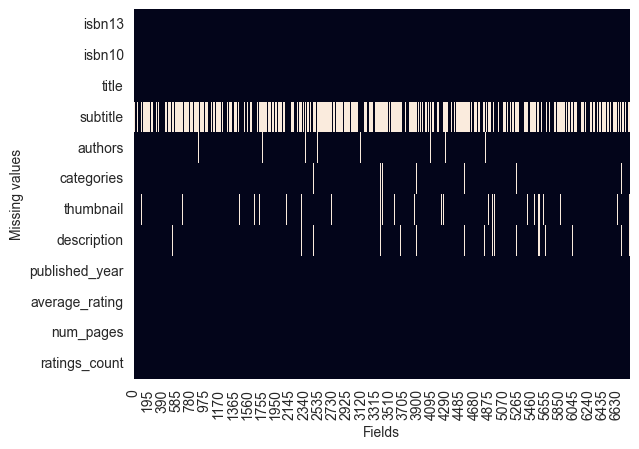

In [9]:
#intialises the matplotlib axes
#to observe the pattern of missing values to determine whether that has any bias, i.e., whether the missing values specific to any specific category.
ax= plt.axes()
#heatmap takes arguments such as data, color bar, axes
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)
plt.xlabel("Fields")
plt.ylabel("Missing values")

plt.show()

In [10]:
import numpy as np

#New column to account for missing desc in binary representation
#where func needs three arguments as cond, val when true, val when false
books["missing_desc"]= np.where(books["description"].isna(),1,0)
books["age_of_book"]= 2025 - books["published_year"]




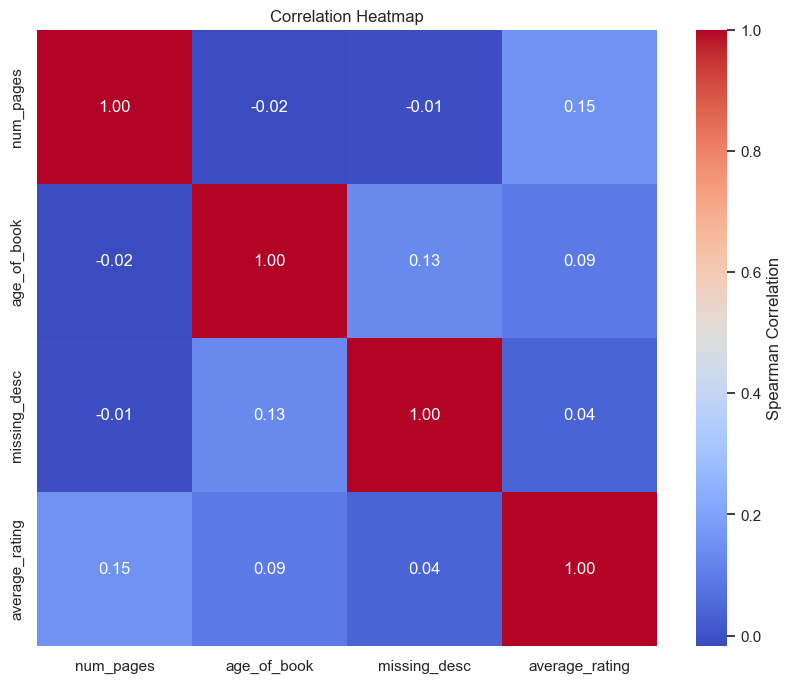

In [24]:
columns_of_interest=["num_pages","age_of_book","missing_desc","average_rating"]

#pearson for continuous data
#spearman for non-continuos data like binary or step func data, i.e., missing_desc.
# correlation tells us about the relationship/dependency between columns or categories where values close to 1 or -1 are highly related and close to 0 have least dependency. Here, it is important to know whether the missingness description is dependent (or biased) on any category
correlation_matrix =books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
heatmap= sns.heatmap(correlation_matrix, annot=True, fmt= ".2f", cmap="coolwarm", cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()

In [17]:
books_missing= books[~(books["description"].isna()) &
      ~(books["num_pages"].isna()) &
      ~(books["average_rating"].isna()) &
      ~(books["published_year"].isna()) ]

In [18]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [31]:
# value_counts calculates the repetition of a category
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,Courage,1
527,Otherland (Imaginary place),1
528,Animals,1
529,Children of divorced parents,1
